In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
# import danych
d = pd.read_csv("dane_hajduk_gwiazda.csv", sep=';', decimal=',')

# Analiza statystyczna

To jest do wklejenia na koniec rozdziału metody, uzupełnijcie tylko nazwy zmiennych zależnych ZZ i niezależnych ZN.
    
> W celu zbadania wpływu ZN na ZZ wykonano jednoczynnikową analizę wariancji. Do porównań par średnich zastosowano test _post-hoc_ Tukey HSD. Wszystkie obliczenia wykonano w języku Python przy użyciu bibliotek _Pandas, Numpy i Statsmodels_. Wykres przygotowano przy użyciu biblioteki _Seaborn_.

# Średnie i odchylenia

In [19]:
gr = d.groupby(['sposob'])

#### Średnie w grupach:

In [25]:
round(gr.wynik.mean(), 2)

sposob
badacz    3.88
cicho     1.79
mysli     1.67
n_bylo    3.80
siebie    2.33
Name: wynik, dtype: float64

#### Odchylenia standardowe:

In [26]:
round(gr.wynik.std(), 2)

sposob
badacz    2.11
cicho     1.10
mysli     1.24
n_bylo    2.71
siebie    1.83
Name: wynik, dtype: float64

# Boxplot

Poniżej wykres gotowy do wklejenia do artykułu. Plik png w wysokiej rozdzielczości w załączniku.

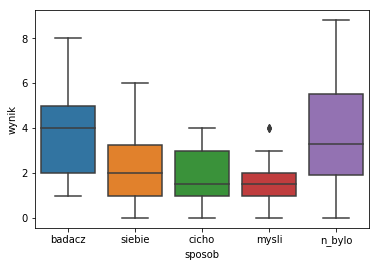

In [46]:
sns.boxplot(x=d.sposob, y=d.wynik)
plt.savefig('boxplot.png', dpi=150)

# Analiza wariancji (ANOVA)

Jednoczynnikowa analiza wariancji odpowiada nam na pytanie, czy istnieją istotne statystycznie różnice pomiędzy średnimi. W tym przypadku istnieją, na poziomie istotności p < 0,001 (czyli możemy stwierdzić, że stwierdzone w waszym badaniu różnice wystepują w populacji z prawdopodobieństwem większym niż 99,9%). Opisując wyniki należy po podaniu wartości śrendnich i odchyleń standardowych napisać coś takiego (oczywiście uzupełnijcie ZZ i ZN).

> Jednoczynnikowa analiza wariancji wykazała istotny wpływ ZN na ZZ, F(4,115) = 7,738, p < 0,001.

In [34]:
mod = ols('wynik ~ sposob',
                data=d).fit()
                
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
sposob,111.046333,4.0,7.737725,0.000015
Residual,412.599583,115.0,NaN,NaN


# Wielokrotne porównania (testy _post-hoc_ Tukey HSD)

Skoro już wiemy, że jest istotna różnica pomiędzy średnimi, musimy odpowiedzieć na pytanie **które** dokładnie pary średnich są różne od siebie. Do tego służy poniższa tabela. W pierszych dwóch kolumnach mamy informację o tym, które grupy ze sobą są porównywane. `meandiff` oznacza różnice pomiędzy średnimi. W ostatniej kolumnie (`reject`) jest informacja o istotności róznicy - jeśli `True` to różnica jest istotna statystycznie, jeśli `False` to nie jest. Opis tej procedury w wynikach powinien wyglądać jakoś tak:

> Testy _post-hoc_ wykazały istotne różnice (p < 0,05) pomiędzy warunkiem XXX a YYY, XXX a ZZZ oraz ZZZ a ŹŹŹ. Nie stwierdzono istotnych różnic pomiędzy warunkiem YYY a ZZZ.

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(d['wynik'], d['sposob'])
mc_results = mc.tukeyhsd()

In [38]:
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
badacz cicho  -2.0833  -3.5988 -0.5678  True 
badacz mysli  -2.2083  -3.7238 -0.6928  True 
badacz n_bylo -0.0708  -1.5863  1.4447 False 
badacz siebie -1.5417  -3.0572 -0.0262  True 
cicho  mysli   -0.125  -1.6405  1.3905 False 
cicho  n_bylo  2.0125   0.497   3.528   True 
cicho  siebie  0.5417  -0.9738  2.0572 False 
mysli  n_bylo  2.1375   0.622   3.653   True 
mysli  siebie  0.6667  -0.8488  2.1822 False 
n_bylo siebie -1.4708  -2.9863  0.0447 False 
---------------------------------------------
